# Sports Car Dataset EDA 
This project performs an Exploratory Data Analysis (EDA) on a sports car dataset to uncover insights into car specifications, performance, and pricing.

- Dataset Source: Kaggle

- Dataset Name: sports car price.csv

- The dataset includes features such as car make, model, engine size, horsepower, torque, 0–60 mph time, and price.

# columns explanation

- car make = company name of car
- car model = specific model of the car under the company
- year = car manufactured year
- engine size  = The engine’s capacity or power
- horsepower = The power of the engine – how fast the car can go.
- torque = Pulling power – like how well the car can climb hills or pull weight
        ((Higher torque gives better pickup and power)
- 0-60 MPH Time (seconds) =  Time taken to accelerate from 0 to 60 miles per hour
                            (Lower time means quicker acceleration – more sporty)
- price =  The cost of the car, in U.S. Dollars.

# Hypotheses for Car Data Analysis  
After analyzing the dataset, the following hypotheses have been formulated, which will be visualized using appropriate graphs.


- which model has higest horsepower or best performance. [barchart]
- Group similar models to compare specs. [Box Plot] - Shows variation & outliers among specs like horsepower, car make.
- Year-wise trends in engine power, price, etc. [Line Graph] - Ideal for trends over time.
- Are new cars generally more expensive?. [Bar Chart (Year vs Avg Price)] 
- Do newer cars (like after 2020) have more horsepower or higher prices?. [Grouped Bar Chart] - Compare two metrics across two groups (before/after 2020).
- In each year, how many models did each company launch? Which company launched more models in less time?. [heatmap]
- Which brand has highest priced cars. [Pie Chart or Donut Chart] - 	Show proportion of total high prices per brand.
- Does engine size affect price?. [Scatter Plot with Regression Line] - Show correlation and pattern clearly.
- Which engine size is most common?. [Histogram] - Shows distribution/frequency of engine sizes.
- Which cars are powerful based on horsepower. [Bar Chart (Top N Models)] - Rank cars by horsepower.
- Correlation with horsepower or 0–60 speed. [Correlation Heatmap0] - Easily visualize strength of relationship
- Which cars are sports-level fast based on 0-60 MPH Time (seconds).[Bar Chart (Sorted Smallest First)] 
- Acceleration performance. [Violin Plot or KDE Plot] - Visualize distribution with shape & density.
- Factors affecting price (engine, brand, etc.). [Pair Plot or Multiple Regression Plot] - Show multiple relationships at once.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sport car price.csv')
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [9]:
df.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

In [11]:
df.rename(columns={
    'Car Make': 'car_make',
    'Car Model': 'car_model',
    'Year': 'year',
    'Engine Size (L)': 'engine_size',
    'Horsepower': 'horsepower',
    'Torque (lb-ft)': 'torque',
    '0-60 MPH Time (seconds)': '0_to_60_sec',
    'Price (in USD)': 'price'
}, inplace=True)

In [11]:
df.columns

Index(['car_make', 'car_model', 'year', 'engine_size', 'horsepower', 'torque',
       '0_to_60_sec', 'price'],
      dtype='object')

In [13]:
df.dtypes

car_make       object
car_model      object
year            int64
engine_size    object
horsepower     object
torque         object
0_to_60_sec    object
price          object
dtype: object

In [13]:
df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['torque'] = pd.to_numeric(df['torque'], errors='coerce')
df['0_to_60_sec'] = pd.to_numeric(df['0_to_60_sec'], errors='coerce')


df['horsepower'] = df['horsepower'].dropna().astype(int)
df['torque'] = df['torque'].dropna().astype(int)


In [15]:
df['price'] = df['price'].str.replace(',', '').astype(float).astype('Int64')

In [17]:
df.dtypes

car_make        object
car_model       object
year             int64
engine_size    float64
horsepower     float64
torque         float64
0_to_60_sec    float64
price            Int64
dtype: object

- The df.describe() function provides a statistical summary of the dataset’s numerical columns.
In this car dataset, it helps understand metrics like average horsepower, engine size, torque, price, and their ranges.

In [21]:
df.describe()

,year,engine_size,horsepower,torque,0_to_60_sec,price
count,1007.000000,948.000000,998.000000,999.000000,1006.000000,1007.0
mean,2021.201589,4.395781,627.324649,542.185185,3.515010,382035.94141
std,2.019802,1.398801,299.973805,242.509345,0.776358,738322.71609
min,1965.000000,0.000000,181.000000,0.000000,1.800000,25000.0
25%,2021.000000,3.500000,454.000000,406.000000,2.900000,71800.0
50%,2021.000000,4.000000,591.000000,509.000000,3.500000,140000.0
75%,2022.000000,5.200000,671.000000,604.000000,4.000000,250000.0
max,2023.000000,8.400000,2000.000000,1732.000000,6.500000,5200000.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   car_make     1007 non-null   object 
 1   car_model    1007 non-null   object 
 2   year         1007 non-null   int64  
 3   engine_size  948 non-null    float64
 4   horsepower   998 non-null    float64
 5   torque       999 non-null    float64
 6   0_to_60_sec  1006 non-null   float64
 7   price        1007 non-null   Int64  
dtypes: Int64(1), float64(4), int64(1), object(2)
memory usage: 64.0+ KB


In [25]:
print(df.isnull().sum())

car_make        0
car_model       0
year            0
engine_size    59
horsepower      9
torque          8
0_to_60_sec     1
price           0
dtype: int64


-> These models offer the best performance in terms of power.

In [28]:
df.shape

(1007, 8)

In [30]:
df.columns

Index(['car_make', 'car_model', 'year', 'engine_size', 'horsepower', 'torque',
       '0_to_60_sec', 'price'],
      dtype='object')

# Outlier Imputation

- This code removes outliers from a DataFrame using the IQR method and then visually compares the distributions before and after cleaning with side-by-side boxplots.
- The boxplots highlight how the outliers have been filtered out, showing a more condensed range in the cleaned data.
- This helps quickly assess the effect of outlier removal on each numeric column’s spread and central tendency

In [19]:
def get_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

def remove_outliers_iqr(df):
    df_clean = df.copy()
    numeric_cols = df_clean.select_dtypes(include='number').columns
    for col in numeric_cols:
        lower, upper = get_bounds(df_clean[col])
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

def plot_boxplots_side_by_side(original_df, cleaned_df):
    numeric_cols = original_df.select_dtypes(include='number').columns
    for col in numeric_cols:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 2.5))

        sns.boxplot(x=original_df[col], ax=axes[0], color='skyblue')
        axes[0].set_title(f'Before Cleaning: {col}')

        sns.boxplot(x=cleaned_df[col], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'After Cleaning: {col}')

        plt.tight_layout()
        plt.show()

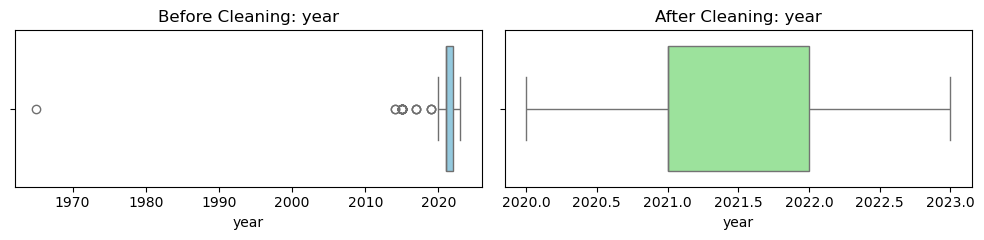

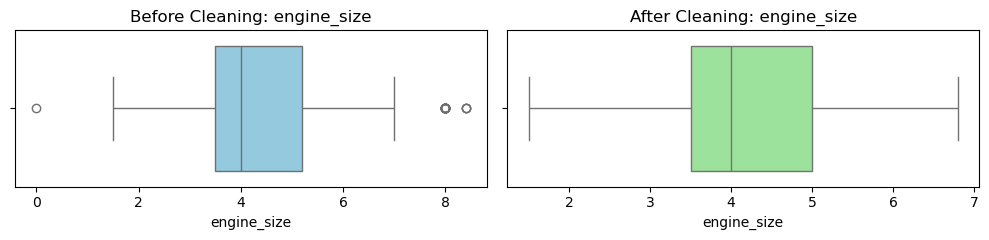

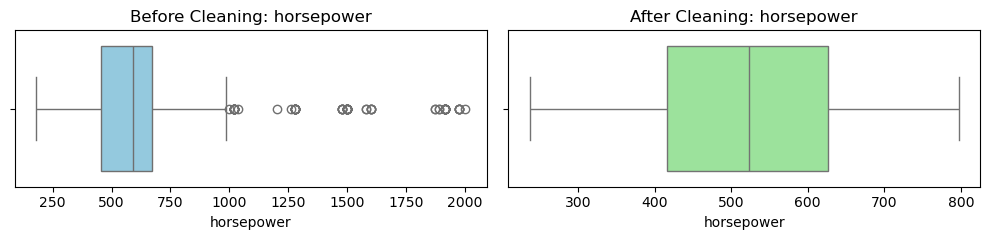

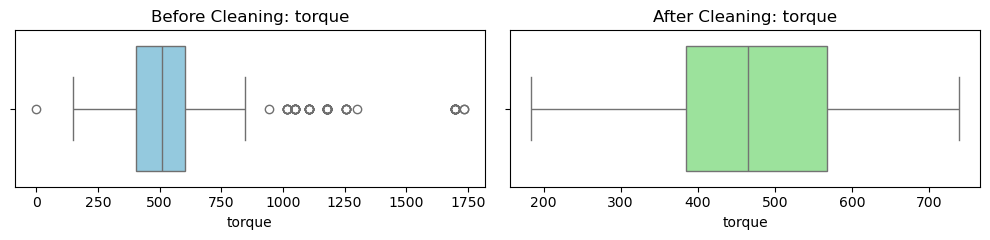

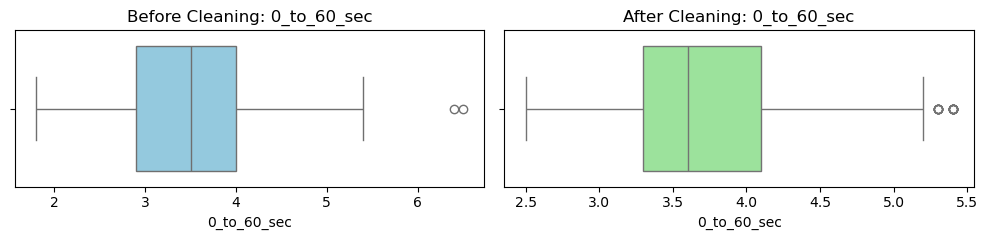

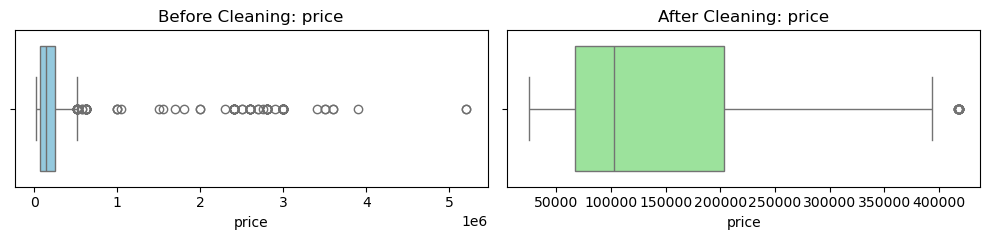

In [21]:
df_clean = remove_outliers_iqr(df)
plot_boxplots_side_by_side(df, df_clean)

- This graph calculates the average horsepower for each car make and displays it as a sorted bar chart.
It visually compares the power levels across different car brands for easy identification of the strongest models.

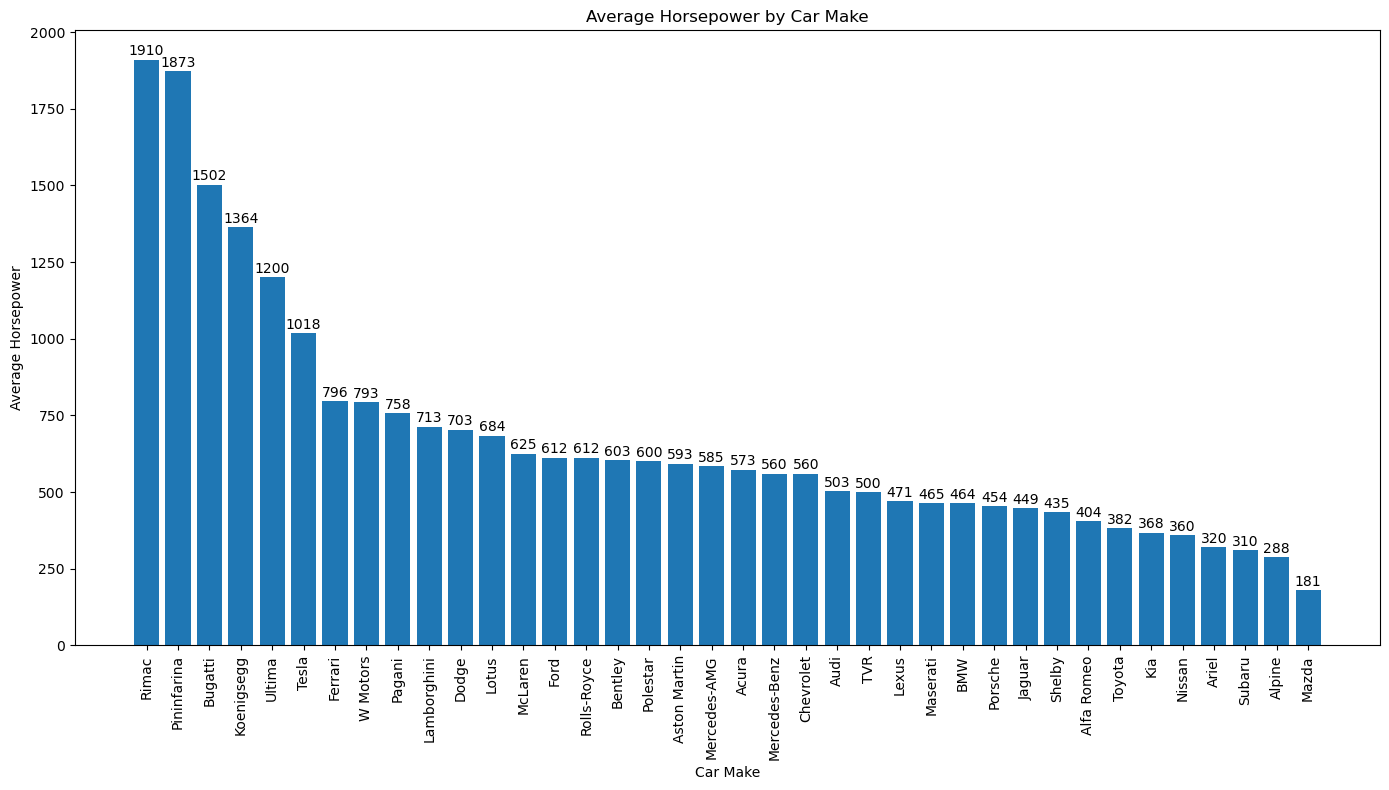

In [63]:
avg_hp = df.groupby('car_make')['horsepower'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))

bars = plt.bar(avg_hp.index, avg_hp.values)
plt.bar_label(bars, fmt='%.0f', padding=1)

plt.title("Average Horsepower by Car Make")
plt.xlabel("Car Make")
plt.ylabel("Average Horsepower")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- You can see how car price increase over the year .Generally, newer models are pricier due to better tech/features.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6480\1233235762.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='year', y='price', ci=None)


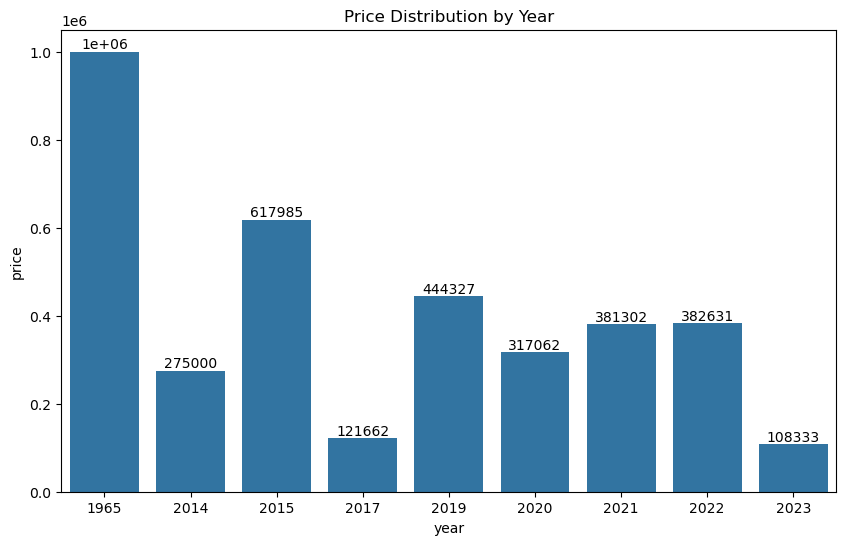

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='year', y='price', ci=None)
plt.title("Price Distribution by Year")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

- This code counts the number of unique car models launched by each brand every year and visualizes it using a heatmap.
- The heatmap highlights trends and variations in model launches over time across different car manufacturers.

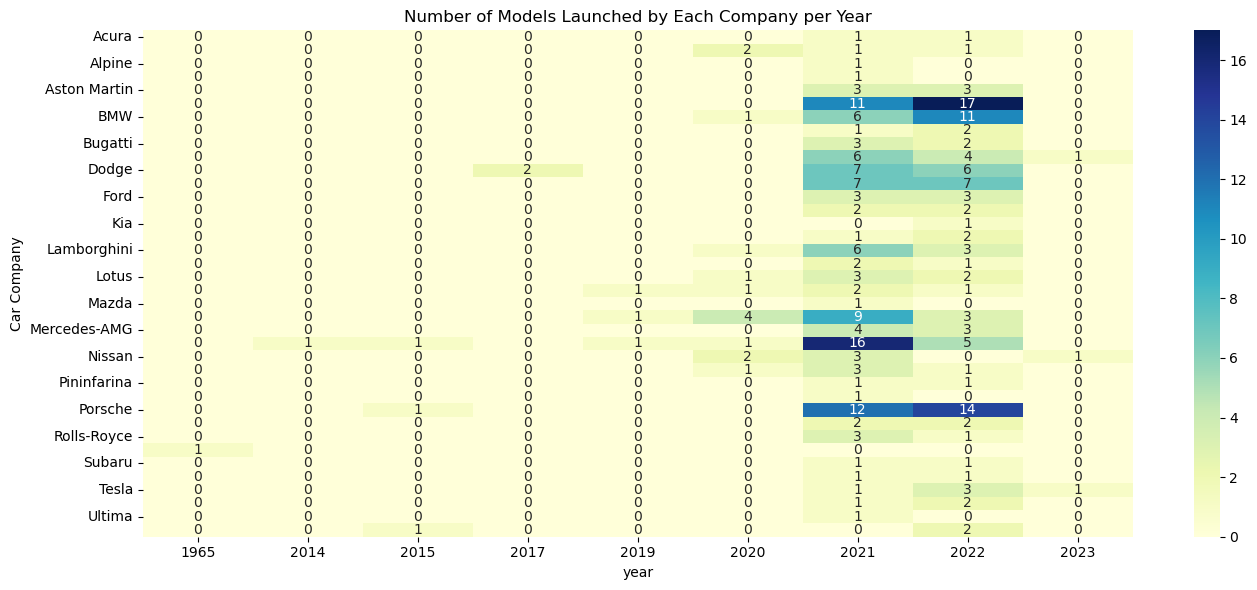

In [67]:
model_counts = df.groupby(['car_make', 'year'])['car_model'].nunique().reset_index()
model_counts.columns = ['car_make', 'year', 'Model Count']

plt.figure(figsize=(14, 6))
pivot_table = model_counts.pivot(index='car_make', columns='year', values='Model Count').fillna(0)

sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Number of Models Launched by Each Company per Year')
plt.ylabel('Car Company')
plt.xlabel('year')
plt.tight_layout()
plt.show()

- Premium brands with expensive offerings stand out here

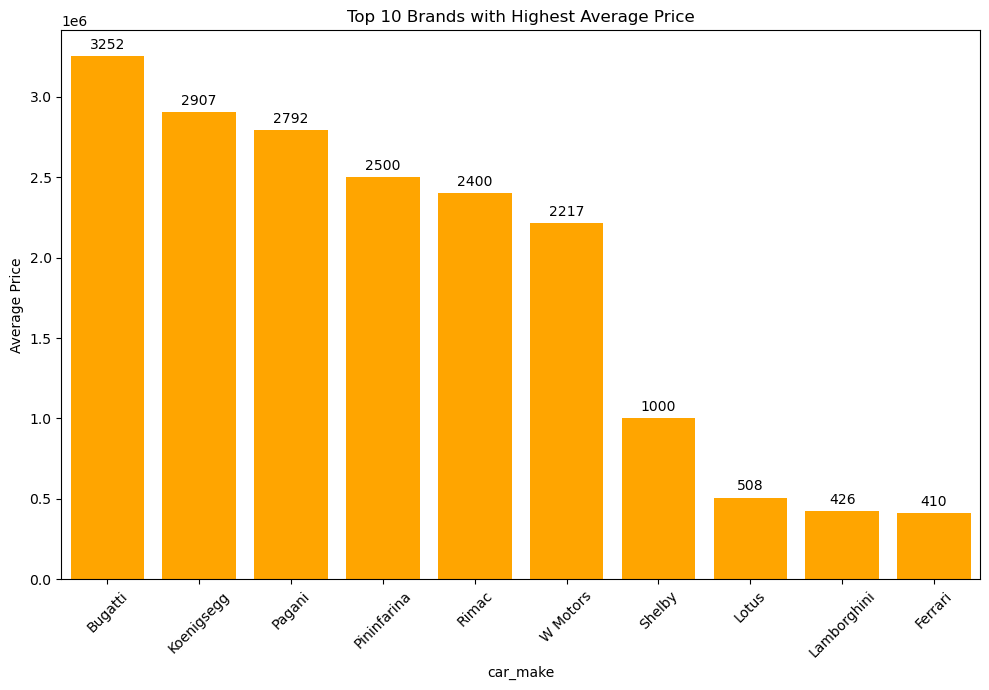

In [69]:
avg_price = df.groupby('car_make')['price'].mean().sort_values(ascending=False).head(10)

avg_price.plot(kind='bar', figsize=(10, 7), color='orange')

top_prices = df.groupby('car_make')['price'].mean().sort_values(ascending=False).head(10)
bars = plt.bar(top_prices.index, top_prices.values, color='orange')
formatted_labels = [f'{v/1e3:.0f}' for v in top_prices.values]  
plt.bar_label(bars, labels=formatted_labels, padding=3)

plt.title("Top 10 Brands with Highest Average Price")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Most of the most expensive cars have engine sizes in the range of approximately 6 to 8 liters.
- On the other hand, some brands have larger engine sizes but are still relatively cheap.
- Price and performance depend not only on engine size but also on brand value, technology, and luxury features.
- While brands like Bugatti and Pagani dominate the high-performance luxury segment with large engines and million-dollar price tags, brands like Dodge, Ford, Nissan and TVR prove that solid performance can still be affordable with moderate engine sizes and budget-friendly prices.

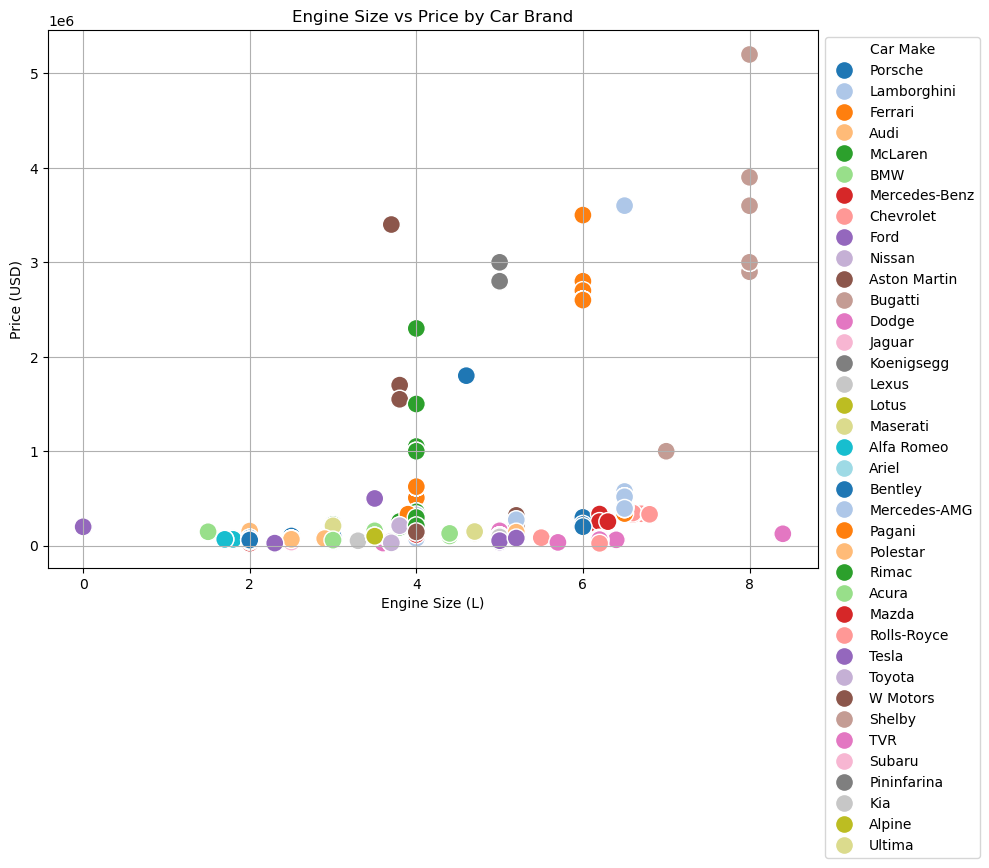

In [109]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='engine_size', y='price', hue='car_make', palette='tab20', s=170)

plt.title("Engine Size vs Price by Car Brand")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Car Make')
plt.tight_layout()
plt.show()

- This code visualizes the top 5 most common engine sizes in the dataset using a pie chart.
It reveals popular engine preferences and helps infer which engine sizes are frequently offered by different manufacturers.

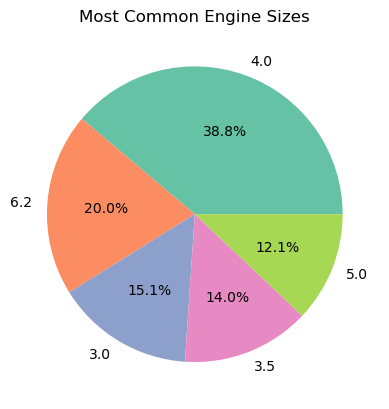

In [73]:
common_engine = df['engine_size'].value_counts().head(5)

common_engine.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Most Common Engine Sizes")
plt.ylabel("")
plt.show()

- A focused view of high-performance vehicles

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6480\2494866418.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=powerful_cars, y='horsepower', x='car_model', palette='mako', ci=None)
C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6480\2494866418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=powerful_cars, y='horsepower', x='car_model', palette='mako', ci=None)


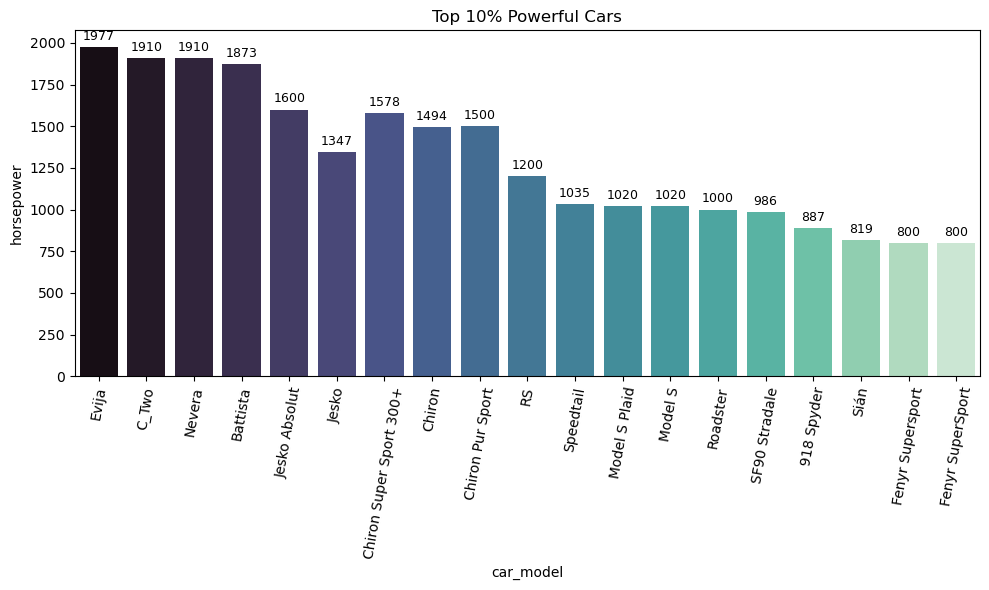

In [36]:
powerful_cars = df[df['horsepower'] > df['horsepower'].quantile(0.90)]
powerful_cars = powerful_cars.sort_values(by='horsepower', ascending=False)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=powerful_cars, y='horsepower', x='car_model', palette='mako', ci=None)
plt.title("Top 10% Powerful Cars")
plt.xticks(rotation=80)
plt.tight_layout()

# Add bar labels
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(f'{height:.0f}',  
                     (bar.get_x() + bar.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                     textcoords='offset points')

plt.show()

# Check Correlation between all numeric features

- Shows which features most influence performance or price

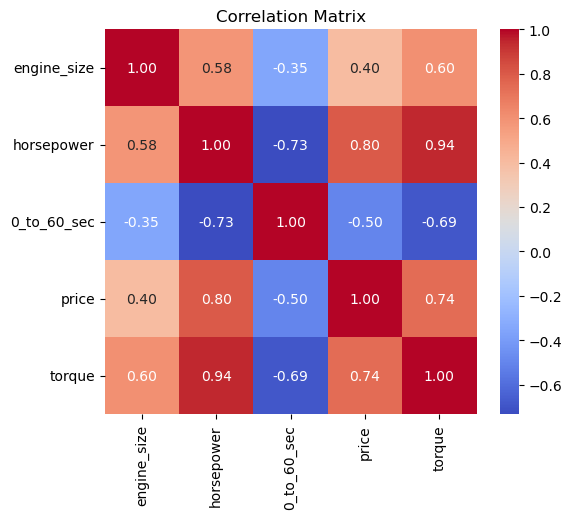

In [23]:
corr = df[['engine_size', 'horsepower', '0_to_60_sec', 'price' , 'torque']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

- Most cars have moderate acceleration; few are very fast

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_5204\2926534887.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['0_to_60_sec'].dropna(), shade=True, color='red')


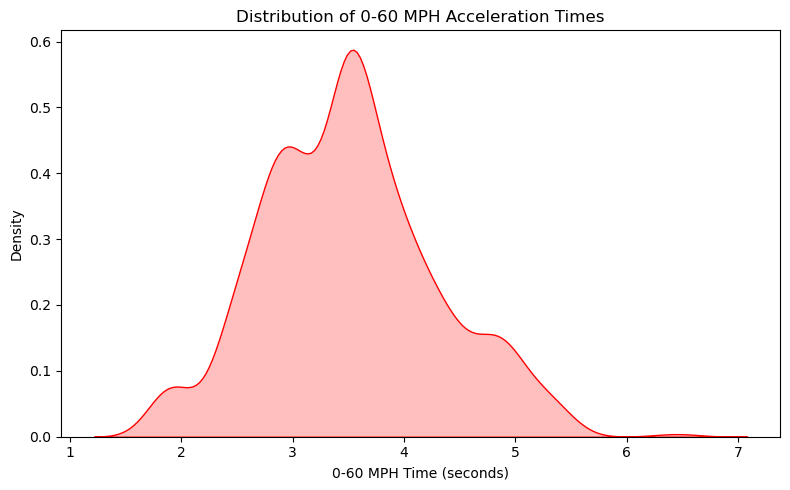

In [79]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['0_to_60_sec'].dropna(), shade=True, color='red')
plt.title("Distribution of 0-60 MPH Acceleration Times")
plt.xlabel("0-60 MPH Time (seconds)")
plt.tight_layout()
plt.show()

- This code creates a scatter plot showing the relationship between car torque and price, colored by car make.
It helps visualize how torque values correlate with pricing across different brands, highlighting market positioning.

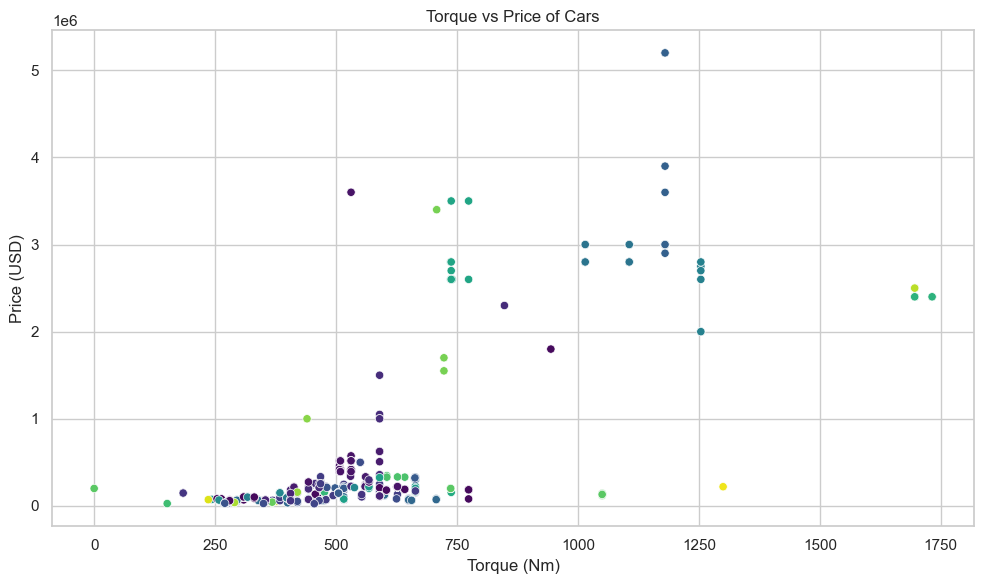

In [93]:
filtered_df = df.dropna(subset=['torque', 'price'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='torque', y='price', hue='car_make', legend=False, palette='viridis')

plt.title("Torque vs Price of Cars")
plt.xlabel("Torque (Nm)")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


- Cars with higher horsepower and lower 0_to_60_sec acceleration times are typically the most sporty and performance-oriented. 
 This strong inverse relationship highlights that as horsepower increases, acceleration improves significantly.
- Generally, as horsepower increases, the price also increases, but there are cars with good horsepower even at a lower price.
- There isn’t any significant relationship between engine size and 0 to 60 seconds acceleration time.

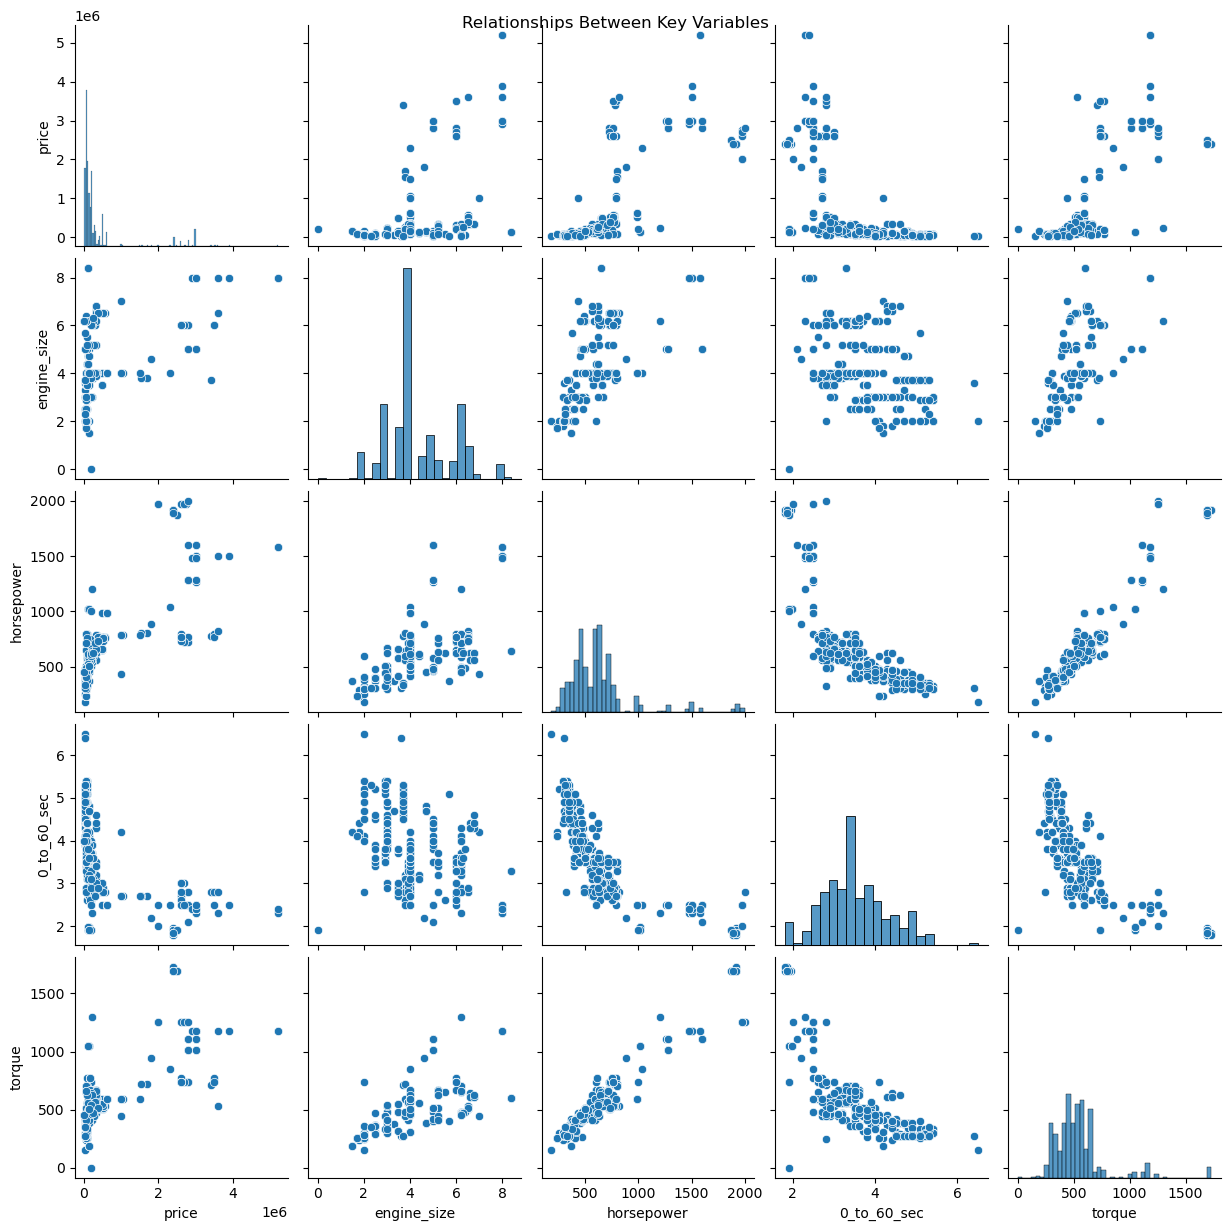

In [87]:
sns.pairplot(df[['price', 'engine_size', 'horsepower', '0_to_60_sec' , 'torque']])
plt.suptitle("Relationships Between Key Variables")
plt.show()

# Data Insights

Based on the analysis of the dataset, Rimac stands out as the best-performing car brand overall. It consistently ranks at the top across multiple performance metrics:

- Highest engine size

- Extremely high horsepower

- Exceptional torque

- Lowest 0 to 60 seconds time, indicating rapid acceleration and superior sportiness

What makes Rimac especially noteworthy is that, despite these elite performance specifications, its price is relatively lower compared to other high-end luxury car brands. This makes Rimac not only one of the most powerful and sporty options available but also a better value proposition in the supercar segment.

If your focus is primarily on ultra-luxury and exclusivity, regardless of performance, then based on the highest prices observed in the dataset, you may consider:

- Bugatti

- Lamborghini

- W Motors

These brands consistently appear at the top of the price range, representing the pinnacle of automotive luxury, prestige, and exclusivity

Following Rimac, which dominates as the top performance electric hypercar, the next best performance-based models identified from the data are:

- Lotus Evija

- Pininfarina Battista

- Tesla Roadster

- Dodge (various high-performance models)

These cars stand out due to their:

- High horsepower

- Exceptional torque

- Large engine capacity (or equivalent electric performance)

- Very low 0 to 60 second times

They deliver superior sporty performance, making them highly suitable for users seeking speed, power, and advanced engineering.